[(The Synthetic Data Vault, 2016)](https://ieeexplore.ieee.org/document/7796926/)

In [59]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [60]:
file = '../dataframes/enh_impute_check.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,aire_acond,antiguedad,bano_comp,bano_excus,bano_regad,bomba_agua,calefacc,calentador,chimenea,...,tot_hom,tot_integ,tot_muj,celular,tel_fijo,tv_paga,año,CVE_ENT,CVE_MUN,CVE_LOC
0,0,2,30,2,0,0,1,2,1,2,...,3,4,1,2,1,2,1,1,1,1
1,1,2,30,2,0,0,1,2,1,2,...,2,6,4,1,1,2,1,1,1,1
2,2,2,42,2,0,0,1,2,2,2,...,3,4,1,2,1,2,2,1,1,1
3,3,2,42,2,0,0,1,2,2,2,...,2,6,4,1,1,2,2,1,1,1
4,4,2,26,2,1,0,1,2,1,2,...,3,4,1,2,1,1,1,1,1,1


In [61]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [62]:
df.shape

(254928, 59)

In [63]:
df_copy = df.copy()

In [64]:
list_columns_og = []
for line in df_copy.columns:
#    print(line, ' : ', df_copy[line].nunique(), '\n')
    list_columns_og.append(df_copy[line].nunique())
    
list_columns_og

[2,
 100,
 10,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 12,
 6,
 5,
 5,
 5,
 8,
 4,
 2,
 80,
 56,
 2,
 2,
 2,
 8,
 3,
 9,
 2,
 21,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 6,
 2,
 5,
 5,
 2,
 14,
 22,
 14,
 2,
 2,
 2,
 4,
 32,
 293,
 817]

In [65]:
categoricos = ['aire_acond', 'bomba_agua', 'calefacc', 'calentador', 'chimenea', 'cisterna', 'cocina', 'combustible', 'computador', 'const_bano', 'const_coci', 'const_dorm', 'disp_agua', 'disp_elect', 'dotac_agua', 'drenaje', 'eli_basura', 'est_socio', 'excusado', 'fregadero', 'internet', 'lavadero', 'mat_pared', 'mat_pisos', 'mat_techos', 'medidor_luz', 'pileta', 'regadera', 'repar_agua', 'repar_cabl', 'repar_dren', 'repar_pard', 'repar_tech', 'sanit_agua', 'tam_loc', 'tanque_gas', 'tenencia', 'tinaco_azo', 'tipo_viv', 'uso_compar', 'celular', 'tel_fijo', 'tv_paga']

In [66]:
for element in categoricos:
    column = element
    
    print(element)

    grouped = pd.DataFrame(df_copy[column].dropna().value_counts())
    grouped.head()

    grouped.reset_index(inplace=True)
    grouped.columns

    grouped.rename(columns={0: 'Key'}, inplace=True)
    grouped.columns

    grouped

    list_ = []
    for row in grouped[column]:
    #    print("%.2f" % (row/df_copy.shape[0]))
        list_.append(row/df_copy.shape[0])
    list_

    grouped[column] = list_
    grouped

    dict_ = grouped.to_dict(orient='split')
    dict_.keys()

    dict_.pop('index')
    dict_.pop('columns')
    dict_

    dict__ = {}

    for line in dict_['data']:
        #print(line[1], ' : ', line[0])
        dict__[line[0]] = line[1]

    dict__

    df_copy[column] = df_copy[column].replace(dict__)
    print(df_copy[column].unique())

aire_acond
[0.81382586 0.18617414]
bomba_agua
[0.23615688 0.76384312]
calefacc
[0.9790686 0.0209314]
calentador
[0.26074029 0.73925971]
chimenea
[0.97048971 0.02951029]
cisterna
[0.19451767 0.80548233]
cocina
[0.94179925 0.05820075]
combustible
[0.77019786 0.05006904 0.15470643 0.01103057 0.01067752 0.00331858]
computador
[0.36937096 0.63062904]
const_bano
[0.63867445 0.36132555]
const_coci
[0.70302203 0.29697797]
const_dorm
[0.56504974 0.43495026]
disp_agua
[0.72258049 0.21046727 0.01216422 0.01422755 0.00260073 0.03795974]
disp_elect
[9.91491715e-01 5.97815854e-03 5.33483964e-04 2.94200715e-04
 1.70244147e-03]
dotac_agua
[0.70571691 0.18035681 0.05477233 0.03463723 0.02451673]
drenaje
[0.71565305 0.21203242 0.06195867 0.00351472 0.00684115]
eli_basura
[8.46199711e-02 7.97766428e-01 6.76857779e-02 7.50015691e-03
 3.61278479e-02 5.07594301e-03 1.10619469e-03 1.17680286e-04]
est_socio
[0.21162446 0.51359207 0.08718932 0.18759414]
excusado
[0.96508818 0.03491182]
fregadero
[0.59951437 0.

In [67]:
list_columns_new = []
for line in df_copy.columns:
#    print(line, ' : ', df_copy[line].nunique(), '\n')
    list_columns_new.append(df_copy[line].nunique())
    
list_columns_new

[2,
 100,
 10,
 9,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 12,
 6,
 5,
 5,
 5,
 8,
 4,
 2,
 80,
 56,
 2,
 2,
 2,
 8,
 3,
 9,
 2,
 21,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 6,
 2,
 5,
 5,
 2,
 14,
 22,
 14,
 2,
 2,
 2,
 4,
 32,
 293,
 817]

In [68]:
df_copy[categoricos]

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,combustible,computador,const_bano,...,sanit_agua,tam_loc,tanque_gas,tenencia,tinaco_azo,tipo_viv,uso_compar,celular,tel_fijo,tv_paga
0,0.813826,0.236157,0.979069,0.26074,0.97049,0.194518,0.941799,0.770198,0.369371,0.638674,...,0.685331,0.442384,0.098087,0.556777,0.560743,0.954603,0.953607,0.333376,0.375047,0.431993
1,0.813826,0.236157,0.979069,0.26074,0.97049,0.194518,0.941799,0.770198,0.630629,0.638674,...,0.685331,0.442384,0.098087,0.556777,0.560743,0.954603,0.953607,0.666624,0.375047,0.431993
2,0.813826,0.236157,0.979069,0.73926,0.97049,0.194518,0.941799,0.770198,0.369371,0.638674,...,0.685331,0.442384,0.901913,0.155993,0.560743,0.954603,0.953607,0.333376,0.375047,0.431993
3,0.813826,0.236157,0.979069,0.73926,0.97049,0.194518,0.941799,0.770198,0.630629,0.638674,...,0.685331,0.442384,0.901913,0.155993,0.560743,0.954603,0.953607,0.666624,0.375047,0.431993
4,0.813826,0.236157,0.979069,0.26074,0.97049,0.194518,0.941799,0.770198,0.369371,0.638674,...,0.685331,0.442384,0.901913,0.556777,0.439257,0.954603,0.953607,0.333376,0.375047,0.568007
5,0.813826,0.236157,0.979069,0.26074,0.97049,0.194518,0.941799,0.770198,0.369371,0.638674,...,0.685331,0.442384,0.901913,0.556777,0.439257,0.954603,0.953607,0.666624,0.375047,0.568007
6,0.813826,0.236157,0.979069,0.26074,0.97049,0.194518,0.941799,0.770198,0.369371,0.638674,...,0.685331,0.442384,0.098087,0.556777,0.560743,0.954603,0.953607,0.333376,0.375047,0.568007
7,0.813826,0.236157,0.979069,0.26074,0.97049,0.194518,0.941799,0.770198,0.369371,0.638674,...,0.685331,0.442384,0.098087,0.556777,0.560743,0.954603,0.953607,0.666624,0.375047,0.568007
8,0.813826,0.236157,0.979069,0.26074,0.97049,0.194518,0.941799,0.770198,0.369371,0.638674,...,0.685331,0.442384,0.098087,0.556777,0.560743,0.954603,0.953607,0.666624,0.375047,0.568007
9,0.813826,0.236157,0.979069,0.26074,0.97049,0.194518,0.941799,0.770198,0.369371,0.638674,...,0.685331,0.442384,0.098087,0.556777,0.560743,0.954603,0.953607,0.666624,0.375047,0.568007


In [72]:
df_copy[categoricos] = df_copy[categoricos]*100

In [73]:
df_copy.head()

,aire_acond,antiguedad,bano_comp,bano_excus,bano_regad,bomba_agua,calefacc,calentador,chimenea,cisterna,...,tot_hom,tot_integ,tot_muj,celular,tel_fijo,tv_paga,año,CVE_ENT,CVE_MUN,CVE_LOC
0,81.382586,30,2,0,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,3,4,1,33.337648,37.504707,43.199256,1,1,1,1
1,81.382586,30,2,0,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,2,6,4,66.662352,37.504707,43.199256,1,1,1,1
2,81.382586,42,2,0,0,23.615688,97.90686,73.925971,97.048971,19.451767,...,3,4,1,33.337648,37.504707,43.199256,2,1,1,1
3,81.382586,42,2,0,0,23.615688,97.90686,73.925971,97.048971,19.451767,...,2,6,4,66.662352,37.504707,43.199256,2,1,1,1
4,81.382586,26,2,1,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,3,4,1,33.337648,37.504707,56.800744,1,1,1,1


In [74]:
numericos = []

for row in df_copy.columns:
    if row not in categoricos:
        if (row != 'CVE_MUN') & (row != 'CVE_LOC') & (row != 'CVE_ENT') & (row != 'año') :
#            print(row)
            numericos.append(row)
            
numericos

['antiguedad',
 'bano_comp',
 'bano_excus',
 'bano_regad',
 'cuart_dorm',
 'focos_ahor',
 'focos_inca',
 'num_cuarto',
 'tot_hog',
 'tot_hom',
 'tot_integ',
 'tot_muj']

In [75]:
df_copy[numericos].head()

,antiguedad,bano_comp,bano_excus,bano_regad,cuart_dorm,focos_ahor,focos_inca,num_cuarto,tot_hog,tot_hom,tot_integ,tot_muj
0,30,2,0,0,3,8,8,6,1,3,4,1
1,30,2,0,0,3,8,8,6,1,2,6,4
2,42,2,0,0,3,6,0,9,1,3,4,1
3,42,2,0,0,3,6,0,9,1,2,6,4
4,26,2,1,0,3,23,0,10,1,3,4,1


In [54]:
# Normalize 
#df_copy[numericos] = preprocessing.normalize(X=df_copy[numericos])
#df_copy[numericos].head()

,antiguedad,bano_comp,bano_excus,bano_regad,cuart_dorm,focos_ahor,focos_inca,num_cuarto,tot_hog,tot_hom,tot_integ,tot_muj
0,0.902894,0.060193,0.000000,0.0,0.090289,0.240772,0.240772,0.180579,0.030096,0.090289,0.120386,0.030096
1,0.890871,0.059391,0.000000,0.0,0.089087,0.237566,0.237566,0.178174,0.029696,0.059391,0.178174,0.118783
2,0.958265,0.045632,0.000000,0.0,0.068447,0.136895,0.000000,0.205342,0.022816,0.068447,0.091263,0.022816
3,0.950869,0.045279,0.000000,0.0,0.067919,0.135838,0.000000,0.203758,0.022640,0.045279,0.135838,0.090559
4,0.708681,0.054514,0.027257,0.0,0.081771,0.626910,0.000000,0.272570,0.027257,0.081771,0.109028,0.027257


In [76]:
df_copy.head()

,aire_acond,antiguedad,bano_comp,bano_excus,bano_regad,bomba_agua,calefacc,calentador,chimenea,cisterna,...,tot_hom,tot_integ,tot_muj,celular,tel_fijo,tv_paga,año,CVE_ENT,CVE_MUN,CVE_LOC
0,81.382586,30,2,0,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,3,4,1,33.337648,37.504707,43.199256,1,1,1,1
1,81.382586,30,2,0,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,2,6,4,66.662352,37.504707,43.199256,1,1,1,1
2,81.382586,42,2,0,0,23.615688,97.90686,73.925971,97.048971,19.451767,...,3,4,1,33.337648,37.504707,43.199256,2,1,1,1
3,81.382586,42,2,0,0,23.615688,97.90686,73.925971,97.048971,19.451767,...,2,6,4,66.662352,37.504707,43.199256,2,1,1,1
4,81.382586,26,2,1,0,23.615688,97.90686,26.074029,97.048971,19.451767,...,3,4,1,33.337648,37.504707,56.800744,1,1,1,1


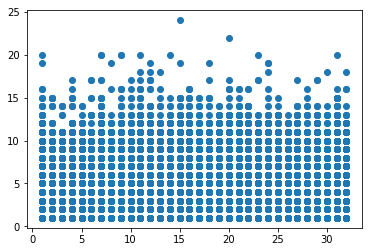

In [77]:
plt.scatter(x=df.CVE_ENT, y=df_copy.tot_integ)

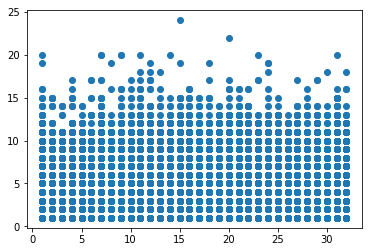

In [78]:
plt.scatter(x=df.CVE_ENT, y=df.tot_integ)

In [79]:
df_copy.to_csv('../dataframes/enh_norm.csv')

## Diccionario `aire_acond`

In [111]:
column = 'CVE_MUN'

In [112]:
grouped = pd.DataFrame(df_copy[column].dropna().value_counts())
grouped.head()

,CVE_MUN
1,14205
5,12926
4,10977
2,10501
3,9057


In [113]:
grouped.reset_index(inplace=True)
grouped.columns


Index(['index', 'CVE_MUN'], dtype='object')

In [114]:
grouped.rename(columns={0: 'Key'}, inplace=True)
grouped.columns

Index(['index', 'CVE_MUN'], dtype='object')

In [115]:
grouped.shape

(293, 2)

In [116]:
grouped

,index,CVE_MUN
0,1,14205
1,5,12926
2,4,10977
3,2,10501
4,3,9057
5,6,8509
6,7,8278
7,17,7109
8,30,6647
9,8,6212


In [117]:
list_ = []
for row in grouped[column]:
#    print("%.2f" % (row/df_copy.shape[0]))
    list_.append((row/df_copy.shape[0])*100)
list_

[5.572161551496893,
 5.070451264670809,
 4.3059216720015066,
 4.119202284566622,
 3.5527678403313874,
 3.3378051842088743,
 3.2471913638360634,
 2.7886305152827466,
 2.6074028745371245,
 2.436766459549363,
 2.2461243959078643,
 2.2320027615640496,
 1.95349275089437,
 1.9181886650348332,
 1.8358124646959142,
 1.7279388690139963,
 1.6863585012238749,
 1.6114353856775245,
 1.5816230465072492,
 1.528666917717944,
 1.5247442415113288,
 1.4078484905541957,
 1.3792129542459046,
 1.2803615138392017,
 1.279184710977217,
 1.2419192870143727,
 1.1579740161928074,
 1.1360070294357623,
 1.0697138015439653,
 1.0359787861670746,
 0.9598788677587397,
 0.955563923931463,
 0.9237902466578799,
 0.8743645264545283,
 0.8127785100106697,
 0.8076790309420699,
 0.8006182137701625,
 0.7606069164626874,
 0.7241260277411662,
 0.7076507876733823,
 0.6590096027113538,
 0.6303740664030628,
 0.6221364463691709,
 0.6189983054038788,
 0.506809765894684,
 0.5064174982740225,
 0.5056329630326994,
 0.4973953429988075,
 0

In [118]:
grouped[column] = list_
grouped

,index,CVE_MUN
0,1,5.572162
1,5,5.070451
2,4,4.305922
3,2,4.119202
4,3,3.552768
5,6,3.337805
6,7,3.247191
7,17,2.788631
8,30,2.607403
9,8,2.436766


In [119]:
dict_ = grouped.to_dict(orient='split')
dict_.keys()

dict_keys(['index', 'columns', 'data'])

In [120]:
dict_.pop('index')
dict_.pop('columns')
dict_

{'data': [[1.0, 5.572161551496893],
  [5.0, 5.070451264670809],
  [4.0, 4.3059216720015066],
  [2.0, 4.119202284566622],
  [3.0, 3.5527678403313874],
  [6.0, 3.3378051842088743],
  [7.0, 3.2471913638360634],
  [17.0, 2.7886305152827466],
  [30.0, 2.6074028745371245],
  [8.0, 2.436766459549363],
  [14.0, 2.2461243959078643],
  [10.0, 2.2320027615640496],
  [39.0, 1.95349275089437],
  [9.0, 1.9181886650348332],
  [20.0, 1.8358124646959142],
  [50.0, 1.7279388690139963],
  [11.0, 1.6863585012238749],
  [18.0, 1.6114353856775245],
  [12.0, 1.5816230465072492],
  [28.0, 1.528666917717944],
  [19.0, 1.5247442415113288],
  [35.0, 1.4078484905541957],
  [37.0, 1.3792129542459046],
  [16.0, 1.2803615138392017],
  [13.0, 1.279184710977217],
  [15.0, 1.2419192870143727],
  [48.0, 1.1579740161928074],
  [33.0, 1.1360070294357623],
  [53.0, 1.0697138015439653],
  [38.0, 1.0359787861670746],
  [21.0, 0.9598788677587397],
  [114.0, 0.955563923931463],
  [29.0, 0.9237902466578799],
  [32.0, 0.87436452

In [121]:
dict__ = {}

for line in dict_['data']:
    #print(line[1], ' : ', line[0])
    dict__[line[0]] = line[1]

dict__

{1.0: 5.572161551496893,
 5.0: 5.070451264670809,
 4.0: 4.3059216720015066,
 2.0: 4.119202284566622,
 3.0: 3.5527678403313874,
 6.0: 3.3378051842088743,
 7.0: 3.2471913638360634,
 17.0: 2.7886305152827466,
 30.0: 2.6074028745371245,
 8.0: 2.436766459549363,
 14.0: 2.2461243959078643,
 10.0: 2.2320027615640496,
 39.0: 1.95349275089437,
 9.0: 1.9181886650348332,
 20.0: 1.8358124646959142,
 50.0: 1.7279388690139963,
 11.0: 1.6863585012238749,
 18.0: 1.6114353856775245,
 12.0: 1.5816230465072492,
 28.0: 1.528666917717944,
 19.0: 1.5247442415113288,
 35.0: 1.4078484905541957,
 37.0: 1.3792129542459046,
 16.0: 1.2803615138392017,
 13.0: 1.279184710977217,
 15.0: 1.2419192870143727,
 48.0: 1.1579740161928074,
 33.0: 1.1360070294357623,
 53.0: 1.0697138015439653,
 38.0: 1.0359787861670746,
 21.0: 0.9598788677587397,
 114.0: 0.955563923931463,
 29.0: 0.9237902466578799,
 32.0: 0.8743645264545283,
 101.0: 0.8127785100106697,
 31.0: 0.8076790309420699,
 27.0: 0.8006182137701625,
 26.0: 0.76060691

In [122]:
df_copy[column] = df_copy[column].replace(dict__)
df_copy[column].unique()

array([5.57216155e+00, 3.55276784e+00, 5.07045126e+00, 3.33780518e+00,
       3.24719136e+00, 1.68635850e+00, 4.30592167e+00, 4.11920228e+00,
       1.91818867e+00, 2.23200276e+00, 2.43676646e+00, 1.61143539e+00,
       7.07650788e-01, 2.60740287e+00, 1.40784849e+00, 1.83581246e+00,
       4.97395343e-01, 8.00618214e-01, 1.52866692e+00, 1.37921295e+00,
       1.03597879e+00, 2.78863052e+00, 1.13600703e+00, 4.23256763e-01,
       1.27918471e+00, 1.25133371e-01, 3.13421829e-01, 8.12778510e-01,
       1.52474424e+00, 2.10647712e-01, 2.16531727e-01, 1.54161175e-01,
       1.74559091e-01, 1.76520429e-01, 2.73802799e-01, 4.30317580e-01,
       9.23790247e-01, 8.07679031e-01, 6.18998305e-01, 1.75735894e-01,
       2.07509571e-01, 1.06696793e-01, 4.80920103e-01, 2.54973953e-01,
       6.23705517e-02, 1.24191929e+00, 3.83245465e-01, 3.55394464e-01,
       1.58162305e+00, 2.24612440e+00, 9.59878868e-01, 6.22136446e-01,
       5.05632963e-01, 4.28748509e-01, 7.24126028e-01, 2.34576037e-01,
      

In [123]:
df_copy[column].nunique()

191